# Zadania - filtrowanie dźwięku


In [1]:
import numpy as np
import tempfile
import os
import os.path
import wave
from IPython.display import Audio, display
import matplotlib.pylab as plt
from scipy import stats

In [2]:
def list2wav(l):
    b = bytes()
    for sample in l:
        s = int((2**15 - 1) * sample).to_bytes(2, 'little', signed=True)
        b += s
    return b

def play_audio(samples , framerate=8000):
    tf, tfname = tempfile.mkstemp(suffix='.wav', dir='')
    os.close(tf)
    tfname = '' + os.path.basename(tfname)
    w = wave.open(tfname, 'wb')
    w.setnchannels(1)
    w.setsampwidth(2)
    w.setframerate(framerate)
    w.setnframes(len(samples))
    if not isinstance(samples, list):
        samples = samples.tolist()
    w.writeframes(list2wav(samples))
    w.close()

    return Audio(tfname)

def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def open_audio(filename):
    f = wave.open(filename, 'rb')
    b = f.readframes(f.getnframes())
    t = np.linspace(0, f.getnframes()/f.getframerate(), f.getnframes())
    f.close()    
    r = []
    for c in chunks(b, 2):
        r.append(int.from_bytes(c, byteorder='little', signed=True) / (2**15 - 1))
    return t, np.array(r)

In [3]:
from pprint import pprint

# Zadanie
Proszę wczydać i odsłychać plik  ja1.wav.

In [43]:
x,y = open_audio('F:\\SZKOLENIE\\statistics\\D16\\ja1.wav')
play_audio(y,framerate=84000)

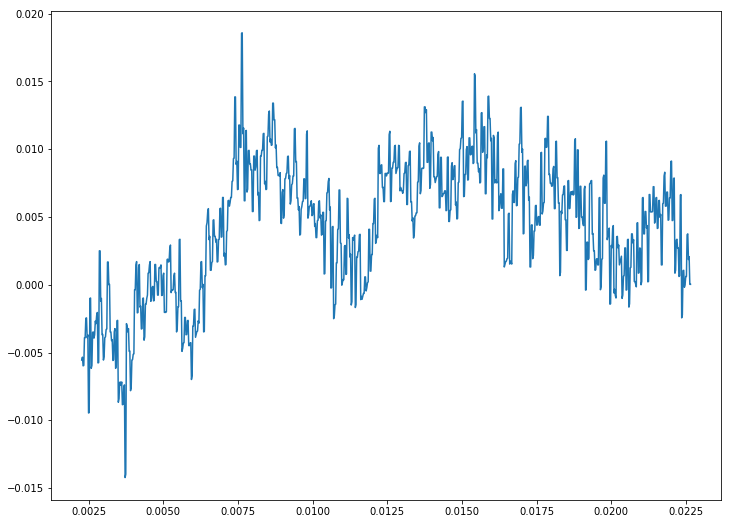

In [5]:
nf=1000
plt.figure(figsize=(12,9))
plt.plot(x[100:nf], y[100:nf])
plt.show()

# Zadanie
Proszę dokonać transformaty Fouriera. 

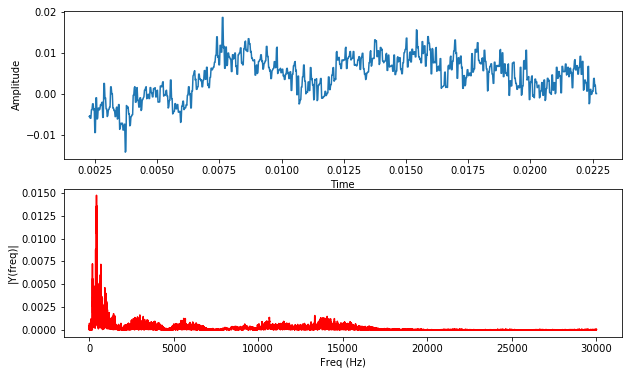

In [6]:
n = len(y) # length of the signal
Y = np.fft.fft(y)/n # fft computing and normalization
z = np.fft.ifft(Y)*n # ifft computing and normalization
frq = np.arange(0,n/2) # one side frequency range
Y = Y[range(np.int(n/2))]

fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(x[100:nf], y[100:nf])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

# Zadanie
Proszę dodać szum gaussowski i wykonać transformatę Fouriera. 

In [7]:
def limit(signal):
    r = []
    for sample in signal:
        if sample > 1:
            sample = 1
        elif sample < -1:
            sample = -1

        r.append(sample)
        
    return r

y_noise = limit(y + stats.norm(0,0.02).rvs(len(y))) 

In [8]:
play_audio(y_noise,framerate=84000)

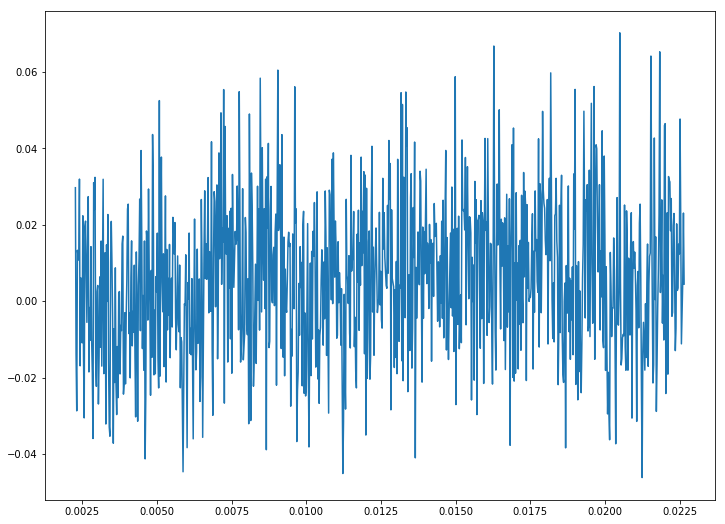

In [9]:
nf=1000
plt.figure(figsize=(12,9))
plt.plot(x[100:nf], y_noise[100:nf])
plt.show()

In [10]:
n = len(y_noise) # length of the signal
Y_noise = np.fft.fft(y_noise)/n # fft computing and normalization

frq = np.arange(0,n/2) # one side frequency range
#Y_noise = Y_noise[range(np.int(n/2))]

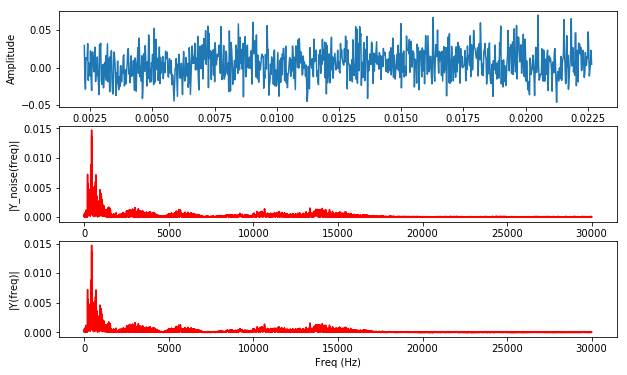

In [11]:
fig, ax = plt.subplots(3, 1,figsize=(10,6))
ax[0].plot(x[100:nf], y_noise[100:nf])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
ax[2].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
plt.show()

# Zadanie
Proszę dokonać filtrowania przez progowanie w dziedzinie częstotliwości.

In [12]:
import copy
Y_noise_filter = copy.copy(Y_noise)
Y_noise_filter[Y_noise_filter < 0.00025]=0

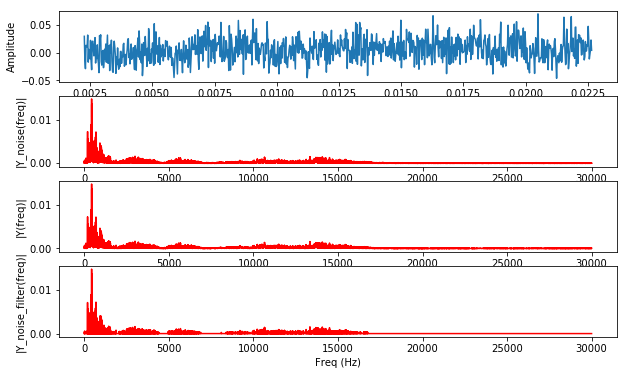

In [13]:
fig, ax = plt.subplots(4, 1,figsize=(10,6))
ax[0].plot(x[100:nf], y_noise[100:nf])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
ax[2].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
ax[3].plot(frq[0:30000],abs(Y_noise_filter)[0:30000],'r') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y_noise_filter(freq)|')
plt.show()

In [14]:
y_noise_filter = np.fft.ifft(Y_noise_filter)*n # ifft computing and normalization

In [15]:
play_audio(limit(np.real(y_noise_filter)),framerate=88000)

# Zadanie
Proszę dokonać filtrowania za pomocą średniej kroczącej w dziedzinie częstotliwości.

In [32]:
import pandas as pd
Y_noise_filter_rolling_mean = copy.copy(Y_noise)
window=3
#Y_noise_filter_rolling_mean = pd.rolling_mean(Y_noise_filter_rolling_mean, window=window)[window:]
#Y_noise_filter_rolling_mean = pd.ewma(Y_noise_filter_rolling_mean, halflife=window)

In [33]:
ser = pd.Series(Y_noise_filter_rolling_mean)
Y_noise_filter_rolling_mean=ser.rolling(window=window, win_type='hamming').mean()[window:]
Y_noise_filter_rolling_mean=Y_noise_filter_rolling_mean.values

D:\Anaconda3\lib\site-packages\pandas\core\window.py:222: ComplexWarning: Casting complex values to real discards the imaginary part
  values = _ensure_float64(values)


In [34]:
Y_noise_filter_rolling_mean

array([  6.68707794e-05,   1.28400549e-04,  -1.01344336e-04, ...,
        -1.01344336e-04,   1.28400549e-04,   6.68707794e-05])

In [35]:
y_noise_filter_rolling_mean = np.fft.ifft(Y_noise_filter_rolling_mean)*n # ifft computing and normalization

In [36]:
play_audio(limit(np.real(y_noise_filter_rolling_mean)),framerate=88000)

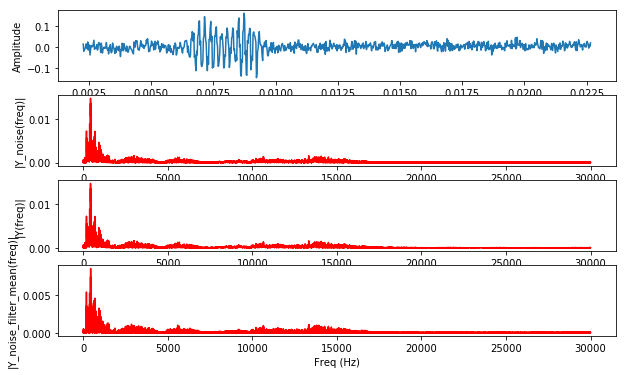

In [37]:
fig, ax = plt.subplots(4, 1,figsize=(10,6))
ax[0].plot(x[100:nf], limit(np.real(y_noise_filter_rolling_mean))[100:nf])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
ax[2].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
ax[3].plot(frq[0:30000],abs(Y_noise_filter_rolling_mean)[0:30000],'r') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y_noise_filter_mean(freq)|')
plt.show()

In [24]:
#Y_noise_filter_rolling_mean
#for i in range(len(Y_noise_filter_rolling_mean)): # (H-red) 
#    if i>=20000:
#        Y_noise_filter_rolling_mean[i]=0